In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')

def run_pca_tsne(data, source_series):
    '''To run PCA and tSNE, return the new axis into dataframe to plot'''
    X_embedded = TSNE(n_components=2, perplexity = 5, random_state = 0).fit_transform(data)
    
    pca = PCA(n_components = 2)
    pca_four = PCA(n_components = 2).fit_transform(data)
    
    df = pd.DataFrame(X_embedded, index = data.index, columns = ['tsne1', 'tsne2'])
    df['pca1'] = [f[0] for f in pca_four]
    df['pca2'] = [f[1] for f in pca_four]
    
    df['source'] = source_series
    return(df)
def plot_tsne_pca(new_df):
    fig, ax = plt.subplots(2, figsize = (3,6))
    groups = new_df.groupby(by = 'source')

    for name, group in groups:
        ax[0].plot(group['tsne1'], group['tsne2'], label = name, marker= 'o', linestyle = '', alpha = 0.3)
        ax[1].plot(group['pca1'], group['pca2'], label = name, marker= 'o', linestyle = '', alpha = 0.3)
        
        ax[0].set_title('t-SNE')
        ax[1].set_title('PCA')
    ax[1].legend(bbox_to_anchor=(1.5, 0.5))

# Unnormalized

In [23]:
import pandas as pd
base = '~/Data/kmers/'
tcga = pd.read_csv(base + 'TCGA_kmers.csv', header = 0, index_col = 0, nrows = 1000)
khoesan = pd.read_csv(base + 'KhoeSan_kmers.csv', header = 0, index_col = 0)
dbgap = pd.read_csv(base + 'dbGap_kmer.csv', header = 0, index_col = 0, nrows = 1000)

# concat dataframe
df = pd.concat([tcga, khoesan, dbgap], axis = 0)

# map index
source_series = pd.Series(index = tcga.index.tolist()+khoesan.index.tolist()+dbgap.index.tolist())
source_series.loc[tcga.index] = 'TCGA'
source_series.loc[khoesan.index] = 'KhoeSan'
source_series.loc[dbgap.index] = 'dbGap'

In [3]:
source_series.head()

TCGA-TM-A84O    TCGA
TCGA-BF-AAP2    TCGA
TCGA-EJ-7794    TCGA
TCGA-CV-A45Q    TCGA
TCGA-DH-5140    TCGA
dtype: object

In [4]:
df.head()

,TGTCTGCCTGGCCCAGCTCT,TCTGCCTGGCCCAGCTCTGT,CCAGCTCTGTGGTGCCTCCA,CAGCTCTGTGGTGCCTCCAG,AGCTCTGTGGTGCCTCCAGG,GCTCTGTGGTGCCTCCAGGA,CTCTGTGGTGCCTCCAGGAC,TCTGTGGTGCCTCCAGGACA,CTGTGGTGCCTCCAGGACAT,TGTGGTGCCTCCAGGACATG,...,GCAT,GCTA,GTAC,GTCA,TACG,TAGC,TCAG,TCGA,TGAC,TGCA
TCGA-TM-A84O,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,21.0,20.0,...,26016.0,14804.0,17264.0,38346.0,9025.0,13529.0,52359.0,9311.0,41327.0,47801.0
TCGA-BF-AAP2,4.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,12.0,12.0,...,30515.0,17288.0,20121.0,46227.0,10697.0,16015.0,61900.0,11503.0,48545.0,55621.0
TCGA-EJ-7794,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,...,29265.0,16708.0,19448.0,43667.0,9418.0,15776.0,58088.0,11807.0,45043.0,51355.0
TCGA-CV-A45Q,10.0,11.0,10.0,10.0,10.0,11.0,11.0,11.0,16.0,15.0,...,35327.0,20058.0,22940.0,52598.0,12321.0,18467.0,70158.0,12846.0,56514.0,63119.0
TCGA-DH-5140,4.0,4.0,6.0,6.0,7.0,7.0,7.0,7.0,15.0,16.0,...,86604.0,52259.0,55550.0,126032.0,28721.0,47651.0,174986.0,33338.0,133275.0,158104.0


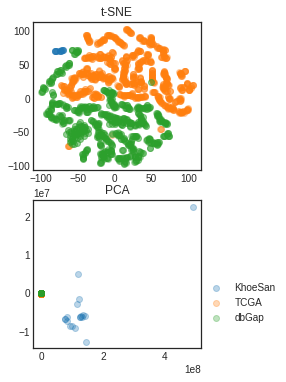

In [24]:
new_df = run_pca_tsne(df, source_series)
plot_tsne_pca(new_df) # perfect batch effect :)

# Normalized

In [18]:
base = '~/Data/normalized_kmer/'
tcga = pd.read_csv(base + 'nor_four.csv', header = 0, index_col = 0, nrows = 1000)
khoesan = pd.read_csv(base + 'nor_KhoeSan.csv', header = 0, index_col = 0)
dbgap = pd.read_csv(base + 'nor_dbGap.csv', header = 0, index_col = 0, nrows = 1000)

# concat dataframe
df = pd.concat([tcga, khoesan, dbgap], axis = 0)

# map index
source_series = pd.Series(index = tcga.index.tolist()+khoesan.index.tolist()+dbgap.index.tolist())
source_series.loc[tcga.index] = 'TCGA'
source_series.loc[khoesan.index] = 'KhoeSan'
source_series.loc[dbgap.index] = 'dbGap'

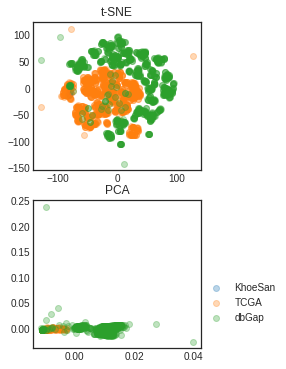

In [22]:
new_df = run_pca_tsne(df, source_series)
plot_tsne_pca(new_df) # perfect batch effect :)

# Double Normalized

In [25]:
base = '~/Data/normalized_kmer/'
tcga = pd.read_csv(base + 'nornor_four.csv', header = 0, index_col = 0, nrows = 1000)
khoesan = pd.read_csv(base + 'nornor_KhoeSan.csv', header = 0, index_col = 0)
dbgap = pd.read_csv(base + 'nornor_dbGap.csv', header = 0, index_col = 0, nrows = 1000)

# concat dataframe
df = pd.concat([tcga, khoesan, dbgap], axis = 0)

# map index
source_series = pd.Series(index = tcga.index.tolist()+khoesan.index.tolist()+dbgap.index.tolist())
source_series.loc[tcga.index] = 'TCGA'
source_series.loc[khoesan.index] = 'KhoeSan'
source_series.loc[dbgap.index] = 'dbGap'

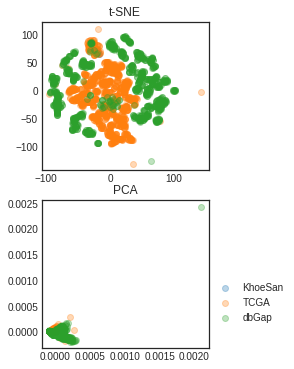

In [26]:
new_df = run_pca_tsne(df, source_series)
plot_tsne_pca(new_df) # perfect batch effect :)

# Double Normalized sum

In [28]:
kmer_df = pd.read_csv('~/Data/kmer_df', header = 0, index_col = 0)
# summing up
selected_kmer = kmer_df.loc[kmer_df['kmer'].isin(df.columns)]

def sum_up(df):
    '''
    given the double normalized kmer, return the sum by KIR dataframe
    '''
    sum_df = pd.DataFrame(index = df.index, columns = selected_kmer['gene'].unique())
    for name, group in selected_kmer.groupby(by = 'gene')['kmer']:
        sum_df[name] = df[group].sum(axis = 1)
    return(sum_df)

In [29]:
nornor_sum = sum_up(df)

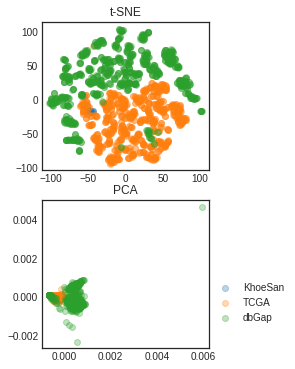

In [30]:
new_df = run_pca_tsne(nornor_sum, source_series)
plot_tsne_pca(new_df) # perfect batch effect :)